In [2]:
import pandas as pd 
import os
import numpy as np 

In [3]:
agg_char_data = pd.read_excel(os.path.join("..", "temp", "FanBaseData05-01-20.xlsx"), header = 0, sheet_name = "Percentile Likes")

In [4]:
agg_char_data.drop(0, axis = 0, inplace=True)
agg_char_data.drop("Unnamed: 4", axis = 1, inplace=True)
agg_char_data.rename(columns={"Unnamed: 0": "id", "Unnamed: 1": "name", "Unnamed: 2": "name_series"}, inplace=True)

In [19]:
agg_char_data

,id,name,name_series,Fans,Chatty,Reserved,Cocky,Humble,Social,Solitary,...,Funny,Serious,Sexy,Romantically Challenged,Smooth,Clumsy,Manipulative,Passive,Dishonest,Honest
1,196.0,Geralt of Rivia,Geralt-of-Rivia.The-Witcher,510.0,0.169102,0.867432,0.760960,0.432150,0.387265,0.925887,...,0.863257,0.605428,0.584551,0.575157,0.881002,0.110647,0.807933,0.172234,0.614823,0.318372
2,303.0,Motoko Kusanagi,Mototo-Kusanagi.Ghost-in-the-Shell,290.0,0.017745,0.938413,0.608559,0.472860,0.074113,0.964509,...,0.024008,0.914405,0.397704,0.807933,0.942589,0.089770,0.808977,0.218163,0.496868,0.680585
3,313.0,Kiki,Kiki.Kikis-Delivery-Service,1020.0,0.239040,0.584551,0.116910,0.919624,0.092902,0.827766,...,0.236952,0.258873,0.349687,0.837161,0.140919,0.750522,0.206681,0.409186,0.297495,0.225470
4,338.0,Satsuki Kusakabe,Satsuki-Kusakabe.My-Neighbor-Totoro,435.0,0.358038,0.581420,0.124217,0.971816,0.210856,0.852818,...,0.300626,0.070981,0.198330,0.912317,0.082463,0.954071,0.259916,0.270355,0.399791,0.063674
5,353.0,Mima Kirigoe,Mima-Kirigoe.Perfect-Blue,157.0,0.152401,0.970772,0.053236,0.992693,0.014614,0.627349,...,0.099165,0.861169,0.881002,0.424843,0.112735,0.519833,0.408142,0.200418,0.494781,0.678497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,5191.0,Carol Danvers,Carol-Danvers.Captain-Marvel,78.0,0.184760,0.752610,0.438413,0.266180,0.956159,0.495825,...,0.565762,0.159708,0.705637,0.330898,0.737996,0.156576,0.144050,0.669102,0.059499,0.085595
954,5197.0,Miles Morales,Miles-Morales.Spider-Man-Into-the-Spiderverse,140.0,0.705637,0.697286,0.303758,0.415449,0.305846,0.366388,...,0.709812,0.057411,0.627349,0.717119,0.165971,0.960334,0.022965,0.587683,0.148225,0.102296
955,100.0,Lara Croft,Lara-Croft.Lara-Croft-Tomb-Raider,732.0,0.352818,0.773486,0.672234,0.631524,0.398747,0.674322,...,0.462422,0.703549,0.776618,0.455115,0.826722,0.274530,0.704593,0.224426,0.592902,0.450939
956,110.0,Max Payne,Max-Payne.Max-Payne,130.0,0.150313,0.980167,0.830898,0.212944,0.534447,0.820459,...,0.930063,0.868476,0.832985,0.500000,0.987474,0.021921,0.940501,0.568894,0.931106,0.735908


In [5]:
#Try on Action first
action_chars = pd.read_csv(os.path.join("..", "data", "chars_per_mov_genre", "Action.csv"))

In [6]:
action_may_2020 = agg_char_data.merge(action_chars["id"], how="inner", on = "id")

In [7]:
X = action_may_2020.iloc[:, 4:action_may_2020.shape[1]].to_numpy()

In [29]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(X)
print(pca.n_components_)
print(pca.explained_variance_ratio_)

29
[0.24307397 0.11842073 0.1027356  0.08735828 0.06483626 0.05319815
 0.03419309 0.02176919 0.02114444 0.01934908 0.01730373 0.01620904
 0.01447003 0.01390971 0.0127243  0.01106792 0.01045141 0.01002246
 0.00943499 0.00897279 0.00821961 0.00815951 0.00729412 0.00676656
 0.0065967  0.00619574 0.00580218 0.00550398 0.00513592]


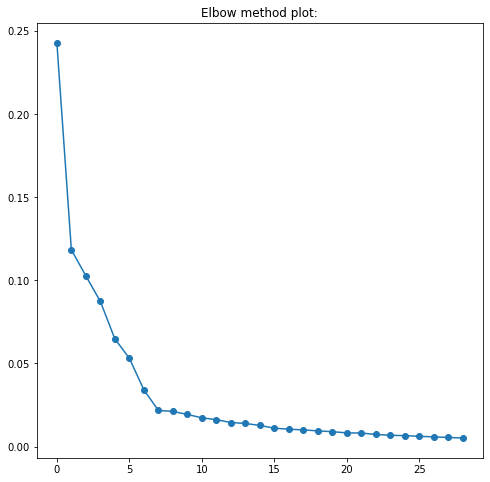

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(pca.explained_variance_ratio_, marker='o')
ax.set_title('Elbow method plot:')
plt.show()

Unlike the earlier user per genre clustering (where each user that fulfilled certain criteria for percentage of likes/# of total likes was included), the analysis on characters contained fewer PCs (with a 95% level) relative to total number of traits (20 to 23 for the former versus 29 to 46). The elbow method suggests the usage of about 8 or so PCs, a little larger than the 5 suggested for the former analysis. There seems to be a larger degree of higher order structure here.


In [36]:
np.cumsum(pca.explained_variance_ratio_)

array([0.24307397, 0.3614947 , 0.46423031, 0.55158859, 0.61642485,
       0.669623  , 0.70381609, 0.72558529, 0.74672972, 0.7660788 ,
       0.78338253, 0.79959157, 0.8140616 , 0.82797131, 0.84069561,
       0.85176352, 0.86221493, 0.87223739, 0.88167238, 0.89064517,
       0.89886478, 0.90702429, 0.91431841, 0.92108498, 0.92768168,
       0.93387742, 0.9396796 , 0.94518357, 0.9503195 ])

The cumulative explained variance ratio at 8 PCs is 72%.

In [8]:
# Normalize data before 
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
X_norm = normalize(X)
kmeans = KMeans(7, n_init=25, random_state=42)
kmeans.fit(X_norm)

KMeans(n_clusters=7, n_init=25, random_state=42)

In [54]:
action_may_2020_clusters = action_may_2020
action_may_2020_clusters["labs"] = kmeans.labels_

<AxesSubplot:>

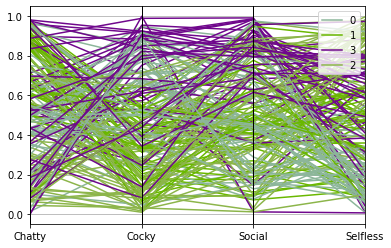

In [63]:
pd.plotting.parallel_coordinates(action_may_2020_clusters, class_column = "labs", cols=action_may_2020_clusters.columns[4:11:2])

In [50]:
from kmeans_param_eval import *
eval_cluster_size(X_norm, {"n_clusters": [2, 3, 4, 5, 6, 7, 8, 9, 25, 26, 27, 28, 29, 30]})

,n_clusters,sil_score,inertia
0,2,0.158792,37.569263
1,3,0.114501,34.332636
2,4,0.109845,32.101386
3,5,0.103328,30.559728
4,6,0.097988,29.290470
5,7,0.106082,28.270435
6,8,0.099695,27.188728
7,9,0.082526,26.664007
8,25,0.087941,19.596152
9,26,0.086577,19.175665


It seems that around 7 clusters would be the best choice for # of clusters selection.

For  [2, 5, 7, 30]  clusters, the average silhouette_score is : 0.15879200403862234
For  [2, 5, 7, 30]  clusters, the average silhouette_score is : 0.09973057285085732
For  [2, 5, 7, 30]  clusters, the average silhouette_score is : 0.09443869738287071
For  [2, 5, 7, 30]  clusters, the average silhouette_score is : 0.08698107200294661


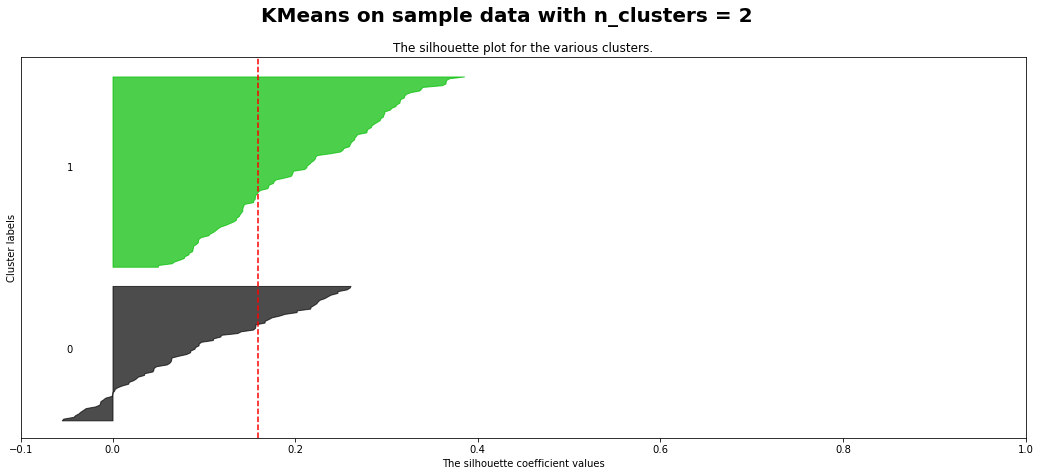

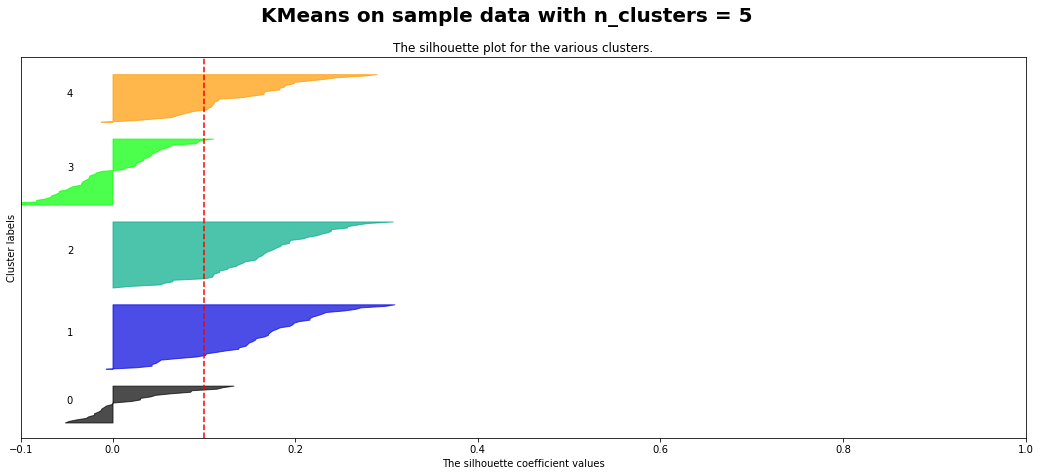

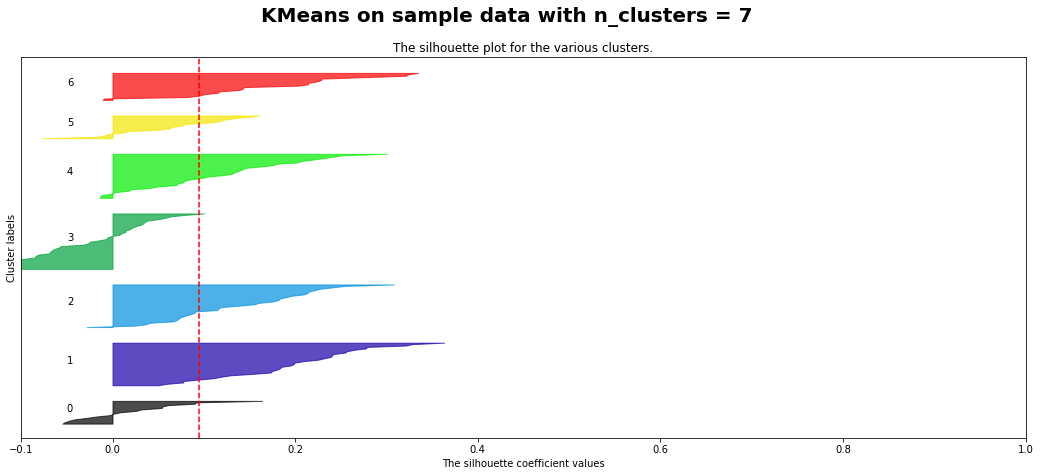

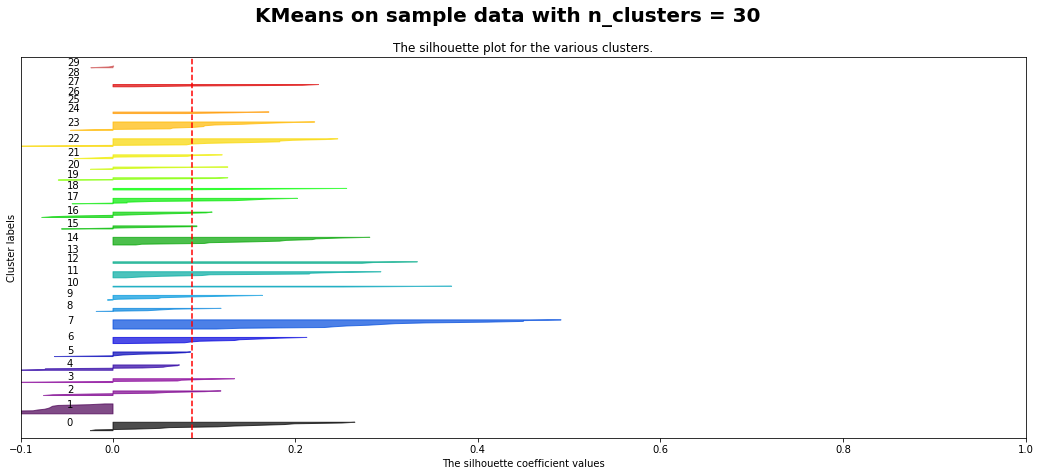

In [71]:
# Silhouette plot 
from kmeans_analysis import *
kmeans_n_sil_plot(X_norm, [2, 5, 7, 30])

In [68]:
import sys
del sys.modules["kmeans_analysis"]

In [11]:
X_norm.shape

(188, 46)